In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:83%; align: left; }</style>"))
display(HTML("<style>#toc-wrapper{ position: relative; width: 20%; top: 130px; left: 0px; }</style>"))

## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 데이터셋 로드

In [4]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [5]:
df.head() #다 숫자로 되어있어서 전처리 불필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [9]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan','low_glu_insulin']]
X.shape

(768, 9)

In [10]:
y = df['Outcome']
y.shape

(768,)

In [11]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요
X_train.shape, y_train.shape

((614, 9), (614,))

In [15]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요
X_test.shape, y_test.shape

((154, 9), (154,))

In [56]:
# DecisionTree를 불러옵니다.
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

## 최적의 하이퍼 파라미터 값 찾기

### 최적의 max_depth 값 찾기

In [66]:
for max_depth in range(3,12):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict)*100
    print(max_depth, score)
model = DecisionTreeClassifier(max_depth = 4, random_state=42)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


### Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth": range(3, 12), "max_features":[0.3,0.5,0.7,0.9,1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=2)

In [80]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [81]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [82]:
clf.best_score_

0.8664934026389444

In [86]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.001978,0.000171,0.000846,0.000121,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.002770,0.000687,0.001250,0.000398,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.002653,0.000521,0.001002,0.000183,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.002805,0.000772,0.001045,0.000254,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.868852,0.858323,0.028361,4
27,0.002834,0.000543,0.001203,0.000322,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5


In [87]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [88]:
clf.score(X_test, y_test)

0.8701298701298701

[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ........................max_depth=3, max_features=1; total time=   0.0s
[CV] END ........................max_depth=3, max_features=1; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.9; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.9; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.9; total time=   0.0s
[CV] END ......................max_depth=7, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=7, max_features=0.5; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=3, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=3, max_features=0.9; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.3; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.5; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=4, max_features=0.9; total time=   0.0s
[CV] END ........................max_depth=4, max_features=1; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   0.0s
[CV] END ......................max_depth=5, max_features=0.7; total time=   0.0s
[CV] END ...................

### Random Search

In [118]:
model

DecisionTreeClassifier(random_state=42)

In [133]:
max_depth = np.random.randint(3 ,20, 10)
max_depth

array([ 4, 18, 18, 17,  6, 18,  8, 18, 17, 10])

In [134]:
max_features = np.random.uniform(0.7,1.0, 100)

In [135]:
param_distributions = {"max_depth": max_depth, 
                       "max_features":max_features,
                      "min_samples_split": list(range(2,7))}
param_distributions

{'max_depth': array([ 4, 18, 18, 17,  6, 18,  8, 18, 17, 10]),
 'max_features': array([0.86904911, 0.93988551, 0.90203514, 0.90161431, 0.82267323,
        0.75333607, 0.97263091, 0.72405287, 0.99227782, 0.91355564,
        0.84316318, 0.76984253, 0.8323727 , 0.78276843, 0.99843187,
        0.74508724, 0.72493403, 0.79304983, 0.81935112, 0.98289642,
        0.92698576, 0.9507816 , 0.93637017, 0.85811062, 0.85299599,
        0.83473201, 0.87662378, 0.9895177 , 0.88833079, 0.74686608,
        0.93757675, 0.94290156, 0.89287958, 0.7615031 , 0.9727595 ,
        0.97402654, 0.91798607, 0.85761867, 0.96096065, 0.98622893,
        0.75091794, 0.76521348, 0.75696288, 0.98829149, 0.74052154,
        0.78154901, 0.79370902, 0.71114243, 0.86868235, 0.77667796,
        0.96033407, 0.80843444, 0.81145364, 0.72374603, 0.99365543,
        0.72951554, 0.70091715, 0.90429479, 0.90106353, 0.87161313,
        0.80055185, 0.81032564, 0.73806916, 0.89187924, 0.72624516,
        0.88709796, 0.79210109, 0.866

In [143]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(model,
                   param_distributions,
                   n_iter=1000,
                   scoring="accuracy",
                   n_jobs=-1,
                   cv=5,
                   random_state=42
                  )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 4, 18, 18, 17,  6, 18,  8, 18, 17, 10]),
                                        'max_features': array([0.86904911, 0.93988551, 0.90203514, 0.90161431, 0.82267323,
       0.75333607, 0.97263091, 0.72405287, 0.99227782, 0.91355564,
       0.84316318, 0.76984253, 0.8323727 , 0.78276843, 0.99843187...
       0.72686998, 0.70533008, 0.76450509, 0.8567569 , 0.89717755,
       0.97057637, 0.76689053, 0.98004535, 0.71758169, 0.89624929,
       0.90948669, 0.71791329, 0.83544376, 0.93512846, 0.82983957,
       0.7353678 , 0.76031055, 0.91752599, 0.92292332, 0.71642225,
       0.76544773, 0.80441176, 0.86543506, 0.95289981, 0.97940062,
       0.99733493, 0.99625967, 0.92087826, 0.81032749, 0.76653845]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   random_state=42, scoring='accuracy')

In [144]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.7668905261636114, 'max_depth': 8}

In [145]:
clf.best_score_

0.8697321071571371

In [146]:
clf.score(X_test, y_test)

0.8766233766233766

In [147]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
675,0.006045,0.005091,0.003551,0.002367,4,0.776678,8,"{'min_samples_split': 4, 'max_features': 0.776...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
898,0.003984,0.000596,0.003366,0.001937,4,0.717582,8,"{'min_samples_split': 4, 'max_features': 0.717...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
451,0.008404,0.004879,0.004889,0.003573,4,0.766891,8,"{'min_samples_split': 4, 'max_features': 0.766...",0.886179,0.853659,0.821138,0.902439,0.885246,0.869732,0.028985,1
88,0.002965,0.000392,0.001340,0.000483,4,0.871613,10,"{'min_samples_split': 4, 'max_features': 0.871...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,4
924,0.005114,0.001688,0.003283,0.000552,4,0.869049,10,"{'min_samples_split': 4, 'max_features': 0.869...",0.902439,0.886179,0.813008,0.845528,0.893443,0.868119,0.033743,4


## 학습과 예측하기

In [115]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
feature_names = X_train.columns.tolist()

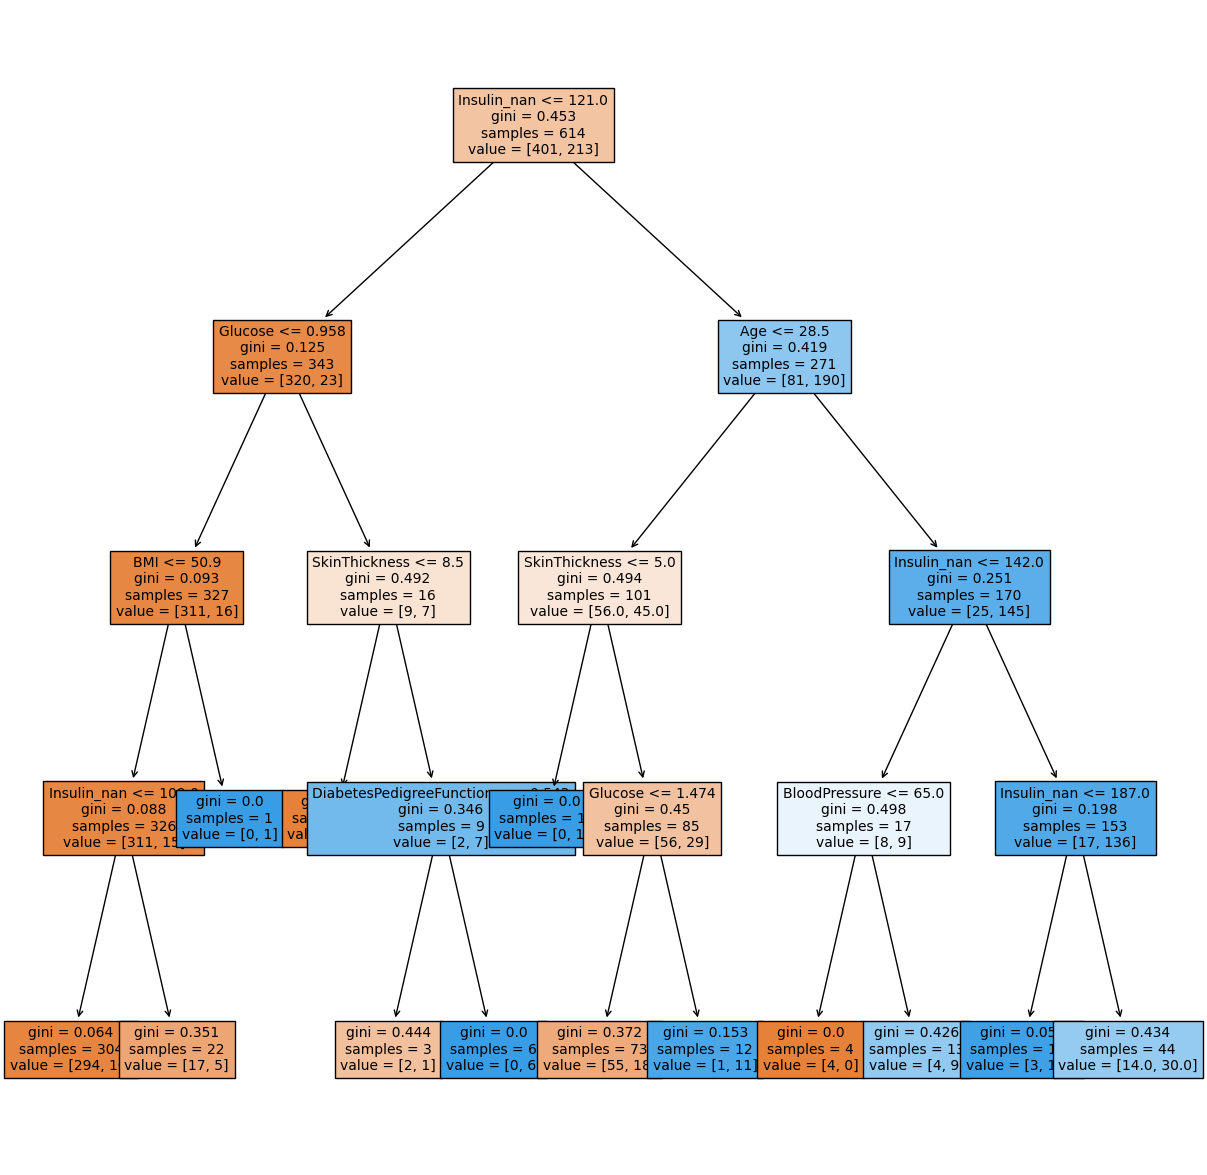

In [69]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
tree = plot_tree(model, feature_names=feature_names,fontsize=10, filled=True)

In [70]:
# 예측을 하고 결과를 y_predict에 담습니다.
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

## 정확도(Accuracy) 측정하기

In [148]:
# 다르게 예측한 갯수를 구해서 diff_count에 할당해줍니다.
abs(y_predict - y_test).sum()

19

In [149]:
# accuracy score를 구합니다.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

87.66233766233766